In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [18]:
Data=pd.read_csv('Hayes_Roth.csv')
Data.head()

,Index,Name,Hobby,Age,Educational level,Marital status,Class
0,0,10,2,1,3,2,2
1,1,83,3,1,4,1,3
2,2,61,2,4,2,2,3
3,3,107,1,1,3,4,3
4,4,113,1,1,3,2,2


In [19]:
Data.isna().sum()

Index                0
Name                 0
Hobby                0
Age                  0
Educational level    0
Marital status       0
Class                0
dtype: int64

In [20]:
Data.shape

(131, 7)

In [21]:
Data.describe()

,Index,Name,Hobby,Age,Educational level,Marital status,Class
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,65.000000,66.305344,2.000000,1.961832,1.961832,1.954198,1.847328
std,37.960506,38.330324,0.822753,0.947909,0.947909,0.951619,0.769348
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.500000,33.500000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,65.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,97.500000,99.500000,3.000000,2.000000,2.000000,2.000000,2.000000
max,130.000000,132.000000,3.000000,4.000000,4.000000,4.000000,3.000000


In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 7 columns):
Index                131 non-null int64
Name                 131 non-null int64
Hobby                131 non-null int64
Age                  131 non-null int64
Educational level    131 non-null int64
Marital status       131 non-null int64
Class                131 non-null int64
dtypes: int64(7)
memory usage: 7.2 KB


In [23]:
pandas_profiling.ProfileReport(Data)

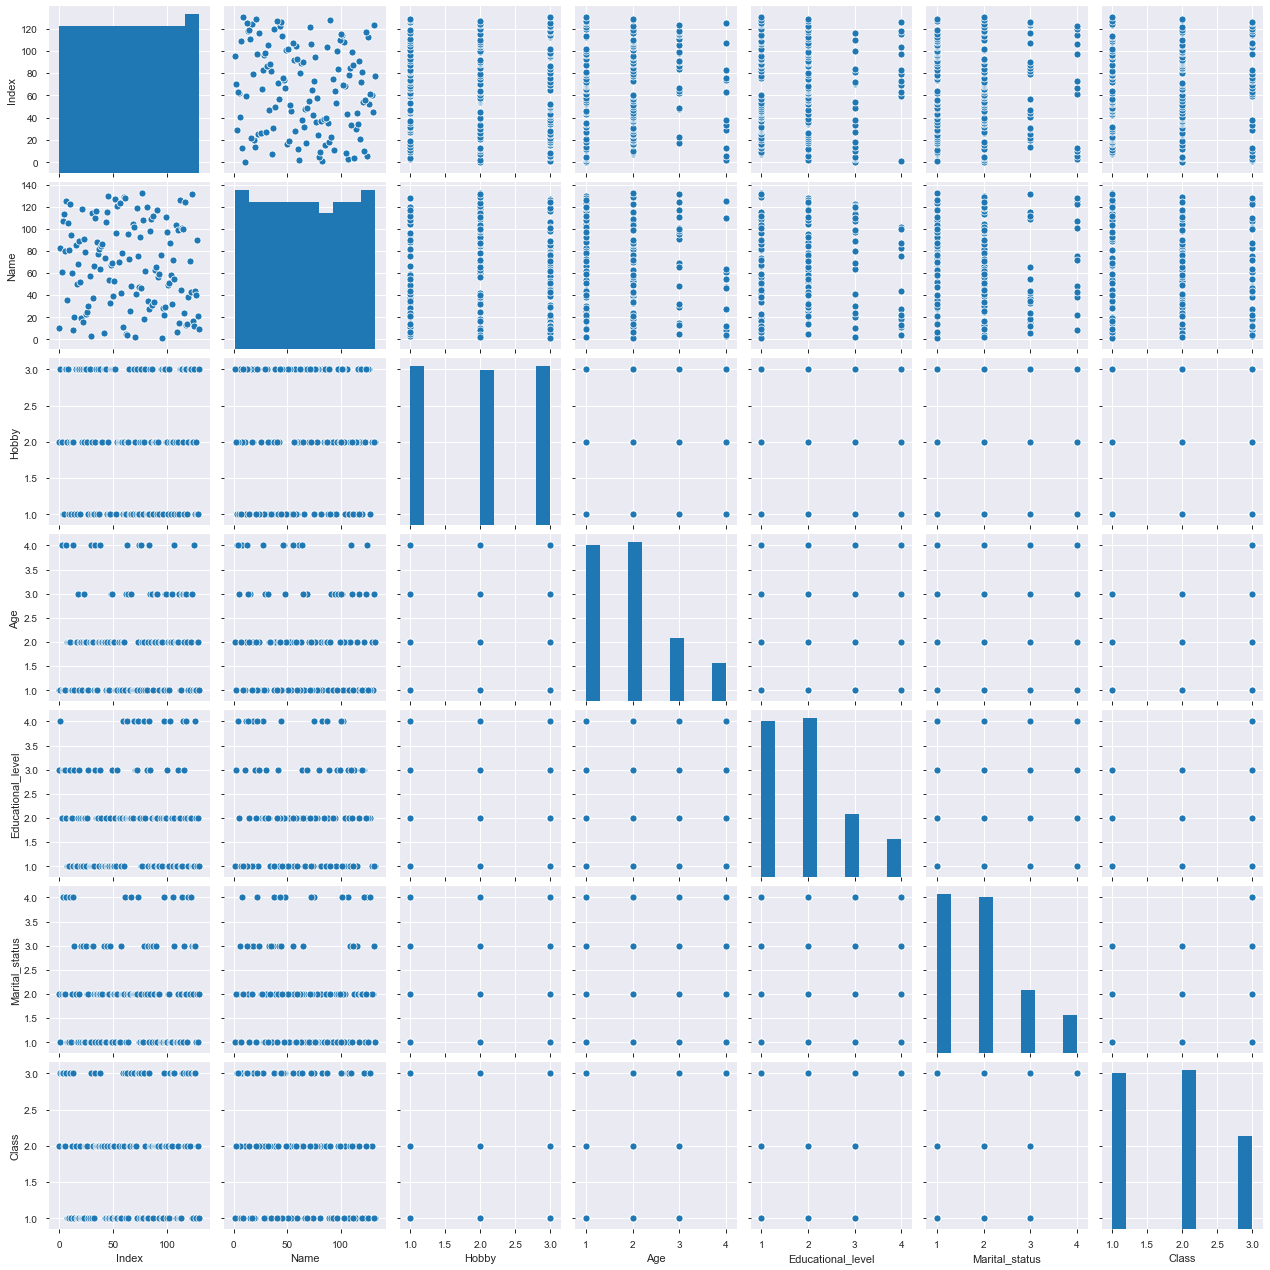

In [24]:
sns.pairplot(Data)

In [25]:
Data.head(1)

,Index,Name,Hobby,Age,Educational_level,Marital_status,Class
0,0,10,2,1,3,2,2


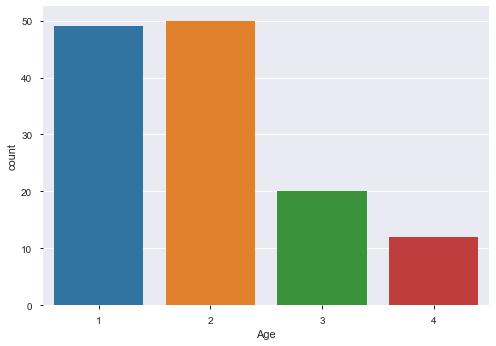

In [26]:
sns.countplot(Data.Age)

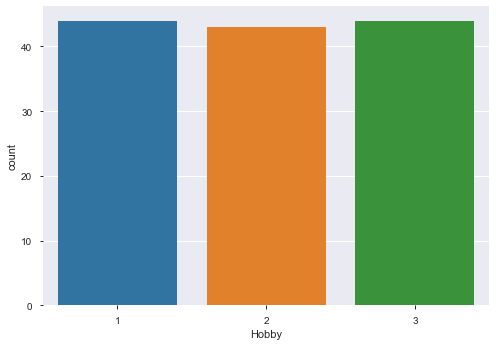

In [27]:
sns.countplot(Data.Hobby)

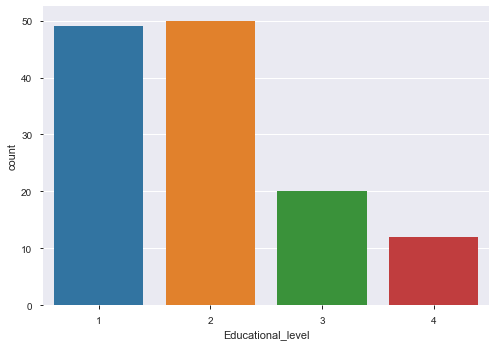

In [28]:
sns.countplot(Data.Educational_level)

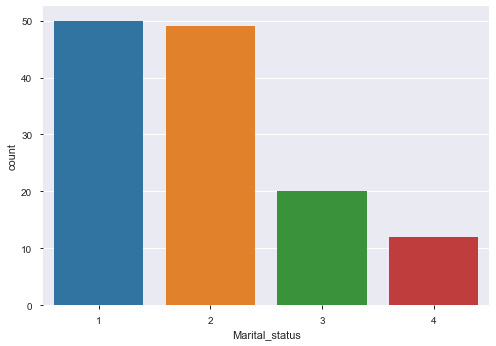

In [29]:
sns.countplot(Data.Marital_status)

In [30]:
from sklearn.preprocessing import RobustScaler

In [31]:
Features= Data.drop(Data[['Class']], axis=1)
Features.head()

,Index,Name,Hobby,Age,Educational_level,Marital_status
0,0,10,2,1,3,2
1,1,83,3,1,4,1
2,2,61,2,4,2,2
3,3,107,1,1,3,4
4,4,113,1,1,3,2


In [33]:
Target= Data['Class']
Target.head()

0    2
1    3
2    3
3    3
4    2
Name: Class, dtype: int64

In [34]:
RS= RobustScaler() # Converts non-numerical data to numerical

In [35]:
X_Data=RS.fit_transform(Features)  # Does data normalization
X_Data

array([[-1.        , -0.84848485,  0.        , -1.        ,  1.        ,
         0.        ],
       [-0.98461538,  0.25757576,  0.5       , -1.        ,  2.        ,
        -1.        ],
       [-0.96923077, -0.07575758,  0.        ,  2.        ,  0.        ,
         0.        ],
       [-0.95384615,  0.62121212, -0.5       , -1.        ,  1.        ,
         2.        ],
       [-0.93846154,  0.71212121, -0.5       , -1.        ,  1.        ,
         0.        ],
       [-0.92307692,  0.21212121,  0.5       , -1.        ,  1.        ,
         0.        ],
       [-0.90769231,  0.89393939,  0.5       ,  2.        ,  0.        ,
         2.        ],
       [-0.89230769, -0.45454545,  0.        ,  0.        , -1.        ,
        -1.        ],
       [-0.87692308,  0.59090909,  0.5       ,  0.        , -1.        ,
        -1.        ],
       [-0.86153846,  0.22727273, -0.5       ,  0.        , -1.        ,
        -1.        ],
       [-0.84615385,  0.84848485,  0.        ,  0.

## Without Train and Test

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
Lr=LogisticRegression()

In [38]:
Lr.fit(X_Data,Target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
Lr.score(X_Data, Target)
        

0.5954198473282443

### With Train and Test Data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,Y_train,Y_test= train_test_split(X_Data, Target, test_size=0.18)

In [42]:
X_train.shape

(107, 6)

In [43]:
X_test.shape

(24, 6)

In [44]:
Y_train.shape

(107,)

In [45]:
Y_test.shape

(24,)

In [46]:
Model = LogisticRegression(solver='lbfgs')

In [47]:
Model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
Model.score(X_train,Y_train)

0.5794392523364486

In [49]:
Model.score(X_test,Y_test)

0.375

In [50]:
New_Pred= Model.predict(X_test)
New_Pred

array([2, 2, 1, 3, 2, 2, 2, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 2, 1, 1, 2,
       3, 1], dtype=int64)

In [52]:
pd.DataFrame({'Actual_Data': Y_test, 'New_Prediction': New_Pred}).head()

,Actual_Data,New_Prediction
41,2,2
81,1,2
39,2,1
47,2,3
31,2,2


In [55]:
Model.predict_proba(X_test)

array([[2.78623621e-01, 6.07693009e-01, 1.13683370e-01],
       [4.28247974e-01, 4.43203902e-01, 1.28548125e-01],
       [5.81798533e-01, 3.95813420e-01, 2.23880472e-02],
       [1.41233715e-01, 4.04431110e-01, 4.54335176e-01],
       [3.50473505e-01, 5.40000938e-01, 1.09525557e-01],
       [3.68349331e-01, 4.92181172e-01, 1.39469497e-01],
       [2.88962816e-01, 5.96538906e-01, 1.14498279e-01],
       [6.42845116e-01, 3.41151638e-01, 1.60032463e-02],
       [6.87863897e-04, 6.85055850e-03, 9.92461578e-01],
       [4.56187810e-01, 4.46765587e-01, 9.70466027e-02],
       [5.68946578e-01, 4.09229948e-01, 2.18234737e-02],
       [2.58724742e-02, 1.40598144e-01, 8.33529382e-01],
       [4.81878817e-03, 3.03706817e-02, 9.64810530e-01],
       [6.97423231e-01, 2.99877306e-01, 2.69946335e-03],
       [6.13998177e-01, 3.70815314e-01, 1.51865089e-02],
       [1.67112979e-01, 3.45790932e-01, 4.87096089e-01],
       [3.20343840e-02, 1.19839761e-01, 8.48125855e-01],
       [5.18334077e-01, 4.58643

### Model Evaluation

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
Cm= confusion_matrix(Y_test,New_Pred)
Cm

array([[3, 3, 0],
       [7, 3, 4],
       [0, 1, 3]], dtype=int64)

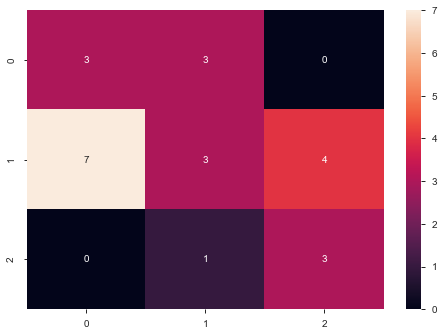

In [59]:
sns.heatmap(Cm, annot= True)

In [60]:
print(classification_report(Y_test, New_Pred))

              precision    recall  f1-score   support

           1       0.30      0.50      0.37         6
           2       0.43      0.21      0.29        14
           3       0.43      0.75      0.55         4

    accuracy                           0.38        24
   macro avg       0.39      0.49      0.40        24
weighted avg       0.40      0.38      0.35        24

